In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Verifica la ruta y el delimitador del archivo CSV
df = pd.read_csv('.\Archivos\Dataset objetivo.csv', engine='python', delimiter=",")
df = df.replace(',', '.', regex=True)
df['realSum'] = df['realSum'].astype(float)
df['dayPrice'] = df['dayPrice'].astype(float)
df['dayPriceByPerson'] = df['dayPriceByPerson'].astype(float)
df['dist'] = df['dist'].astype(float)
df['metro_dist']= df['metro_dist'].astype(float)
df['attr_index_norm']= df['attr_index_norm'].astype(float)
df['person_capacity']= df['person_capacity'].astype(int)

# Realiza las operaciones que necesites con el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   dayPrice                    51707 non-null  float64
 2   dayPriceByPerson            51707 non-null  float64
 3   room_type                   51707 non-null  object 
 4   room_shared                 51707 non-null  bool   
 5   room_private                51707 non-null  bool   
 6   person_capacity             51707 non-null  int32  
 7   host_is_superhost           51707 non-null  bool   
 8   multi                       51707 non-null  int64  
 9   biz                         51707 non-null  int64  
 10  cleanliness_rating          51707 non-null  int64  
 11  guest_satisfaction_overall  51707 non-null  int64  
 12  bedrooms                    51707 non-null  int64  
 13  dist                        517

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   dayPrice                    51707 non-null  float64
 2   dayPriceByPerson            51707 non-null  float64
 3   room_type                   51707 non-null  object 
 4   room_shared                 51707 non-null  bool   
 5   room_private                51707 non-null  bool   
 6   person_capacity             51707 non-null  int32  
 7   host_is_superhost           51707 non-null  bool   
 8   multi                       51707 non-null  int64  
 9   biz                         51707 non-null  int64  
 10  cleanliness_rating          51707 non-null  int64  
 11  guest_satisfaction_overall  51707 non-null  int64  
 12  bedrooms                    51707 non-null  int64  
 13  dist                        517

In [59]:
df.describe()

,realSum,dayPrice,dayPriceByPerson,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,155121.000000,155121.000000,155121.000000,155121.000000,155121.000000,155121.000000,155121.000000,155121.000000,155121.000000,155121.000000,155121.000000,155121.000000,155121.000000,155121.000000,155121.000000,155121.000000,155121.000000
mean,243.090117,64.685975,220.323437,3.161661,0.291353,0.350204,9.390624,92.628232,1.158760,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,129.529224,55.335517,249.861622,1.298537,0.454387,0.477035,0.954862,8.945473,0.627406,2.393787,0.858017,224.752674,9.807921,497.917016,17.803982,9.799661,5.249229
min,34.779339,8.694835,17.389670,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,37.188043,90.194972,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.453135,0.248474,136.794635,6.380849,250.853914,8.751455,-0.072500,41.399490
50%,211.343089,52.835772,149.462593,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,294.812148,76.512080,267.010911,4.000000,1.000000,1.000000,10.000000,99.000000,1.000000,4.263169,0.737937,385.764063,17.415677,832.629367,32.965152,13.519480,51.471940
max,716.612378,4636.362571,19405.912651,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


Utilizamos SeaBorn para analizar cantidades de cada tipo de habitacion y cantidad de superhost en el dataset

In [60]:
df.groupby(['room_type']).size()

room_type
Entire home/apt    97944
Private room       56079
Shared room         1098
dtype: int64

In [61]:
df.groupby(['host_is_superhost']).size()

host_is_superhost
False    115425
True      39696
dtype: int64

Observamos la proporcion de cada tipo de habitacion y dentro de cada una la cantidad de superhost

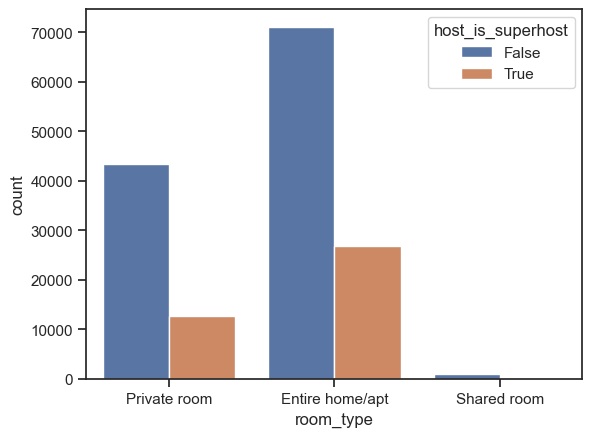

In [62]:
#sns.set(style='darkgrid')
sns.countplot(x='room_type',data=df,hue='host_is_superhost')
plt.show()

Analizamos la distribucion de los precios por persona

<Figure size 1000x1000 with 0 Axes>

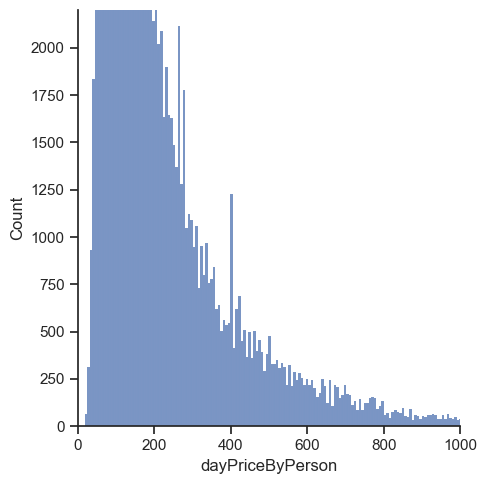

In [63]:
fig = plt.figure(figsize=(10,10))
sns.displot(df['dayPriceByPerson'])
plt.xlim(left=0, right=1000)  # Establecer los límites del eje x
plt.ylim(bottom=0, top=2200)  # Establecer los límites del eje y
plt.show()

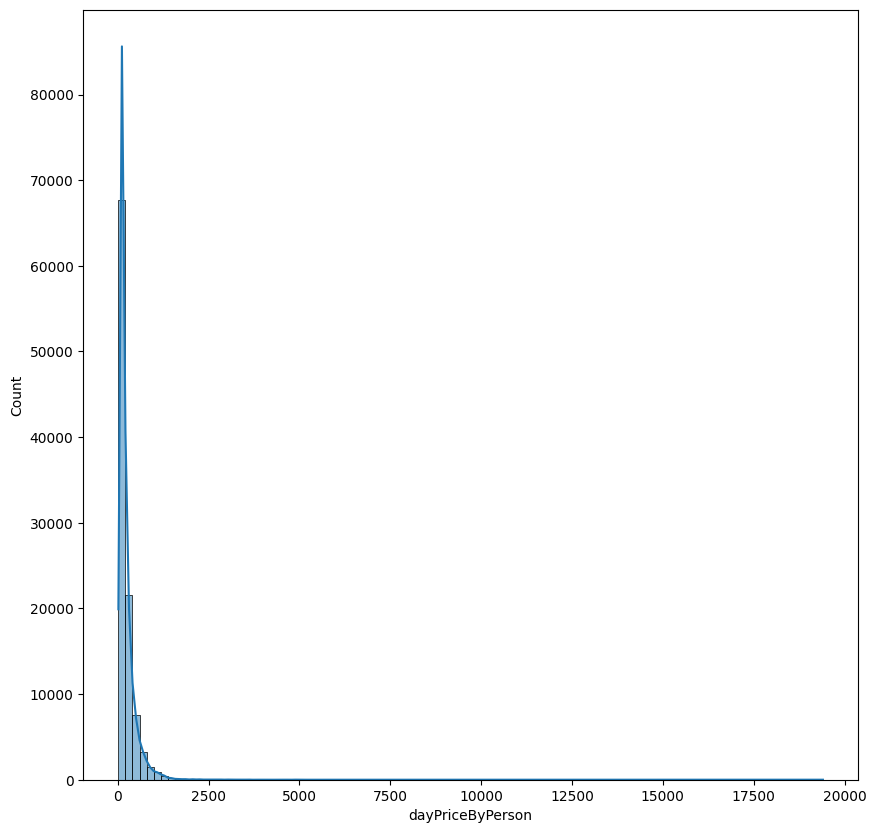

In [25]:
fig = plt.figure(figsize=(10,10))
sns.histplot(df['dayPriceByPerson'], bins=100, kde=True)
plt.show()

Analizando el promedio de precios por dia por persona en cada ciudad

Text(0.5, 1.0, 'Promedio de Precios por Ciudad')

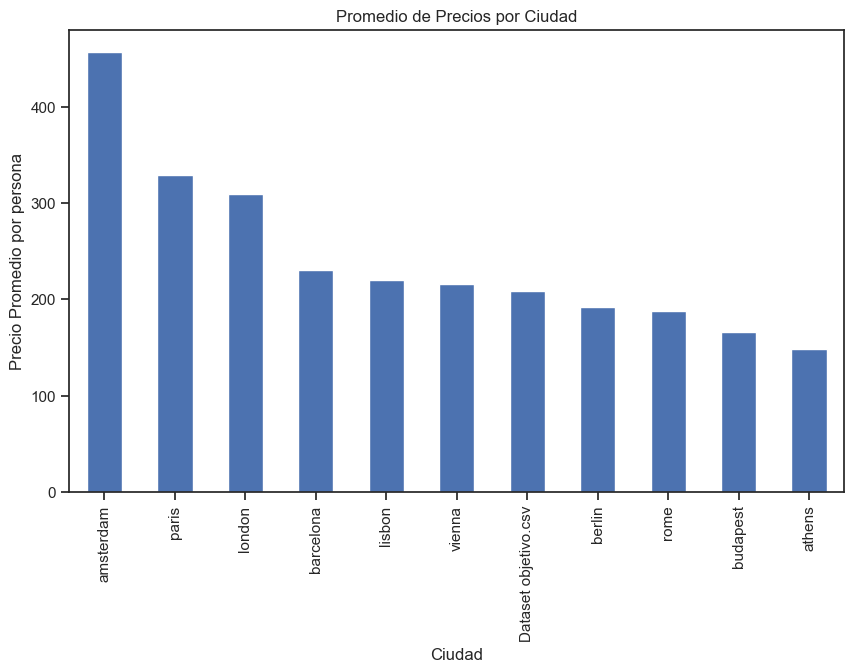

In [64]:
# Calcular el promedio de precios por ciudad
promedios = df.groupby('city')['dayPriceByPerson'].mean().sort_values(ascending=False)

# Crear el gráfico de barras con los promedios de precios
fig, ax = plt.subplots(figsize=(10, 6))
promedios.plot(kind='bar', ax=ax)

# Personalizar el gráfico
ax.set_xlabel('Ciudad')
ax.set_ylabel('Precio Promedio por persona')
ax.set_title('Promedio de Precios por Ciudad')

Analizando la relacion entre las variables de limpieza y valoracion final

Text(0.1, 0.9, 'Coef. Corr.: 0.71')

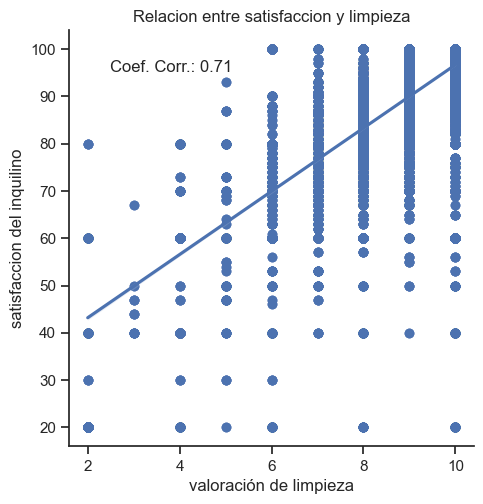

In [65]:
sns.set_theme(style='ticks')
sns.lmplot(
    data = df, x = 'cleanliness_rating', y='guest_satisfaction_overall'
)

coef_corr = df['cleanliness_rating'].corr(df['guest_satisfaction_overall'])

plt.xlabel('valoración de limpieza')
plt.ylabel('satisfaccion del inquilino')
plt.title('Relacion entre satisfaccion y limpieza')

plt.annotate(f'Coef. Corr.: {coef_corr:.2f}', xy=(0.1, 0.9), xycoords='axes fraction')

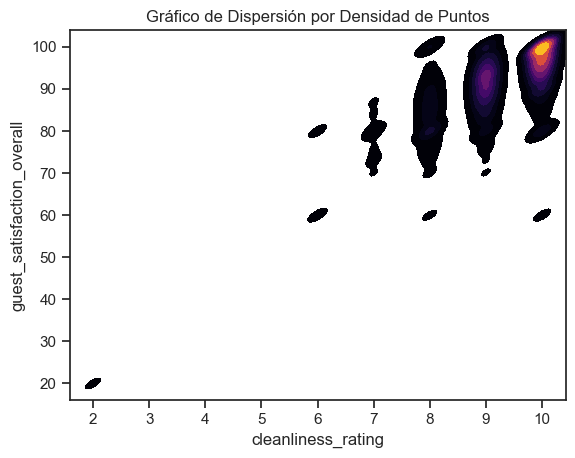

In [28]:
sns.kdeplot(x=df['cleanliness_rating'], y=df['guest_satisfaction_overall'], cmap='inferno', fill=True)

# Personalizar el gráfico
plt.xlabel('cleanliness_rating')
plt.ylabel('guest_satisfaction_overall')
plt.title('Gráfico de Dispersión por Densidad de Puntos')

plt.show()

## Modelo de Predicción
### Dividisión de variable a predecir del resto del dataset

In [66]:
columnas_numericas = df.select_dtypes(include=[float, int]).columns
# Crea el nuevo dataframe con las columnas numéricas
X = df[columnas_numericas].copy()
print(X.columns)

y = df.iloc[:, 2].values #columna dayPrice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index(['realSum', 'dayPrice', 'dayPriceByPerson', 'person_capacity', 'multi',
       'biz', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms',
       'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')


In [30]:
X

,realSum,dayPrice,dayPriceByPerson,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,194.033698,48.508425,97.016849,2,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,344.245776,86.061444,344.245776,4,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,264.101422,66.025356,132.050711,2,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,433.529398,108.382349,433.529398,4,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,485.552926,121.388231,242.776463,2,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103409,715.938574,178.984643,1073.907861,6,0,1,10,100,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136
103410,304.793960,76.198490,152.396980,2,0,0,8,86,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296
103411,637.168969,159.292242,318.584484,2,0,0,10,93,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460
103412,301.054157,75.263539,150.527079,2,0,0,10,87,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200


In [31]:
y

array([ 48.50842453,  86.061444  ,  66.02535561, ..., 159.29224225,
        75.26353926,  33.30762219])

###  Entrenamiento del modelo de Regresión Lineal con el dataset de Training

In [32]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Predicción de los resultados del dataset de Test

In [33]:
y_pred = regressor.predict(X_test)
y_pred

""" Recorrer todas las columnas numéricas para probar la regresión lineal """
# for var in columnas_numericas:
#     x = X_train[[var]]
#     print(x)
#     print(y_train)
#     plt.scatter(x, y_train, color = 'red')
#     plt.plot(x, regressor.predict(x), color = 'blue')
#     plt.title('Salary vs Experience (Training set)')
#     plt.xlabel('Years of Experience')
#     plt.ylabel('Salary')
#     plt.show()

' Recorrer todas las columnas numéricas para probar la regresión lineal '

## Modelo de Predicción 2

In [34]:
# de km a cuadras:
from_km_to_blocks = 0.1
df["dist_en_cuadras"] = df["dist"] / from_km_to_blocks
df

,realSum,room_type,dayPrice,dayPriceByPerson,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekday,city,dist_en_cuadras
0,194.033698,Private room,48.508425,97.016849,False,True,2,False,1,0,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,True,amsterdam,50.229638
1,344.245776,Private room,86.061444,344.245776,False,True,4,False,0,0,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,True,amsterdam,4.883893
2,264.101422,Private room,66.025356,132.050711,False,True,2,False,0,1,...,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,True,amsterdam,57.483119
3,433.529398,Private room,108.382349,433.529398,False,True,4,False,0,1,...,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,True,amsterdam,3.848620
4,485.552926,Private room,121.388231,242.776463,False,True,2,True,0,0,...,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,True,amsterdam,5.447382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103409,715.938574,Entire home/apt,178.984643,1073.907861,False,False,6,False,0,1,...,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,False,vienna,5.301808
103410,304.793960,Entire home/apt,76.198490,152.396980,False,False,2,False,0,0,...,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,False,vienna,8.102052
103411,637.168969,Entire home/apt,159.292242,318.584484,False,False,2,False,0,0,...,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,False,vienna,9.940513
103412,301.054157,Private room,75.263539,150.527079,False,True,2,False,0,0,...,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,False,vienna,30.440997


In [35]:
X_row = df.iloc[:, -1].values
X = X_row.reshape(-1,1)
X

array([[50.22963798],
       [ 4.88389289],
       [57.48311915],
       ...,
       [ 9.94051332],
       [30.4409973 ],
       [12.63931726]])

In [36]:
y = df.iloc[:, 2].values #columna dayPrice
y

array([ 48.50842453,  86.061444  ,  66.02535561, ..., 159.29224225,
        75.26353926,  33.30762219])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
X_train

array([[44.65920572],
       [17.93258292],
       [24.97521781],
       ...,
       [35.91474808],
       [24.16837991],
       [21.3938255 ]])

In [39]:
y_train

array([ 47.71103405,  39.36915614, 109.76550628, ...,  37.68903314,
        68.54451292,  36.01306575])

In [40]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = regressor.predict(X_test)
y_pred

array([68.57443619, 61.72157297, 65.40827052, ..., 64.51148019,
       67.15755368, 69.12479437])

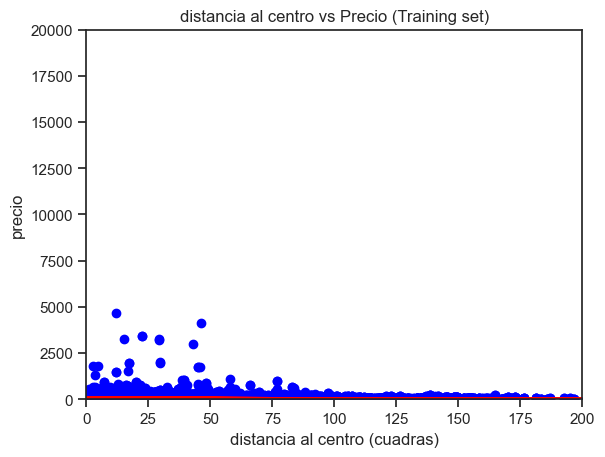

In [42]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('distancia al centro vs Precio (Training set)')
plt.xlabel('distancia al centro (cuadras)')
plt.ylabel('precio')

y_limit = 20000
x_limit = 200
plt.ylim(0, y_limit)
plt.xlim(0,x_limit)

plt.show()

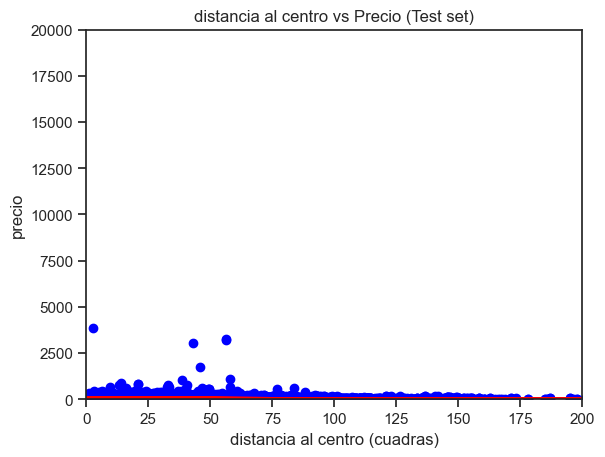

In [43]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('distancia al centro vs Precio (Test set)')
plt.xlabel('distancia al centro (cuadras)')
plt.ylabel('precio')

y_limit = 20000
x_limit = 200
plt.ylim(0, y_limit)
plt.xlim(0,x_limit)

plt.show()

In [44]:
r2 = r2_score(y_test, y_pred)
r2
# pesimo coeficiente

0.001668903286011103

## Prediccion 3
#### Predecir precio por dia por persona (dayPriceByPerson) a traves de la distancia al centro

In [45]:
dataset = df

X = dataset.iloc[:, [14]].values #Seleccionar variables person_capacity
y = dataset.iloc[:, 3].values #Seleccionar la variable independiente --> dayPriceByPerson

In [46]:
dataset

,realSum,room_type,dayPrice,dayPriceByPerson,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekday,city,dist_en_cuadras
0,194.033698,Private room,48.508425,97.016849,False,True,2,False,1,0,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,True,amsterdam,50.229638
1,344.245776,Private room,86.061444,344.245776,False,True,4,False,0,0,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,True,amsterdam,4.883893
2,264.101422,Private room,66.025356,132.050711,False,True,2,False,0,1,...,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,True,amsterdam,57.483119
3,433.529398,Private room,108.382349,433.529398,False,True,4,False,0,1,...,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,True,amsterdam,3.848620
4,485.552926,Private room,121.388231,242.776463,False,True,2,True,0,0,...,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,True,amsterdam,5.447382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103409,715.938574,Entire home/apt,178.984643,1073.907861,False,False,6,False,0,1,...,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,False,vienna,5.301808
103410,304.793960,Entire home/apt,76.198490,152.396980,False,False,2,False,0,0,...,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,False,vienna,8.102052
103411,637.168969,Entire home/apt,159.292242,318.584484,False,False,2,False,0,0,...,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,False,vienna,9.940513
103412,301.054157,Private room,75.263539,150.527079,False,True,2,False,0,0,...,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,False,vienna,30.440997


In [47]:
X

array([[2.53938   ],
       [0.23940392],
       [3.65162129],
       ...,
       [0.20253882],
       [0.28743468],
       [0.48090251]])

In [48]:
y

array([ 97.01684906, 344.24577602, 132.05071122, ..., 318.58448449,
       150.52707851, 133.23048875])

### 2) Dividir el dataset en Training y Test

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 78)

###  3) Entrenar modelo de Regresión Lineal con el dataset de Training

In [50]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [51]:
print('coeficiente = ' + str(regressor.coef_) + ', intercepto = ' + str(regressor.intercept_))

coeficiente = [-19.09204781], intercepto = 242.8285167601188


#### Predecir los resultados del dataset de Test

In [52]:
y_pred = regressor.predict(X_test)
y_pred

array([237.67001542, 233.76482541, 232.21750512, ..., 241.34936094,
       228.77961974, 224.44356672])

#### Predecir 1 valor puntual

In [53]:
valor_capacidad = 4
valor_distancia = 1.26
valor_x_array = np.array([valor_capacidad, valor_distancia])
pred_valor_x = regressor.predict(valor_x_array.reshape(-2,2))
pred_valor_x

ValueError: X has 2 features, but LinearRegression is expecting 1 features as input.

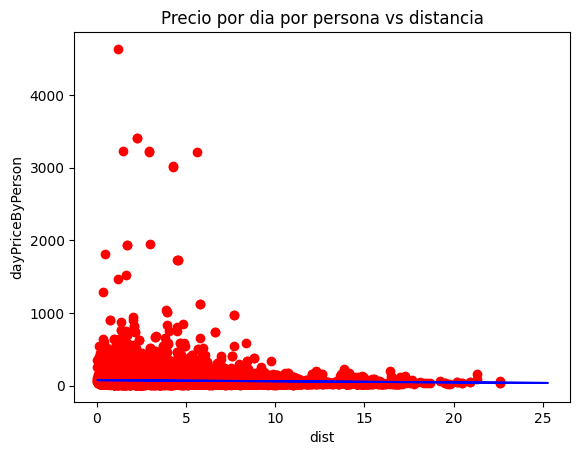

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Precio por dia por persona vs distancia')
plt.xlabel('dist')
plt.ylabel('dayPriceByPerson')
plt.show()

#### R2 Coeficiente de determinacion
Entiende la varianza de los datos del modelo y de los datos reales.
Mientras mas se acerca a 1 es mejor.

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.001272250779704387

#### MSE Mean Square Error - Error cuadratico medio
Compara los valores predichos por el modelo con los valores reales al cuadrado.

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

41.5500311379295

## Prediccion 4
#### Predecir precio por dia (dayPrice), teniendo en cuenta el indice de atraccion del lugar

In [ ]:
dataset = df

X_row = dataset.iloc[:, 17].values # Seleccionar variable attr_indice_normalizado
X = X_row.reshape(-1,1)
y = dataset.iloc[:, 2].values # Seleccionar la variable independiente --> dayPrice

In [ ]:
X

array([[ 4.16670787],
       [33.42120862],
       [ 3.9859077 ],
       ...,
       [12.10792146],
       [ 7.82280266],
       [10.77426362]])

In [ ]:
y

array([ 388.0673962, 1376.983104 ,  528.2028448, ..., 1274.337938 ,
        602.108314 ,  532.9219548])

### 2) Dividir el dataset en Training y Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 60)

###  3) Entrenar modelo de Regresión Lineal con el dataset de Training

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('coeficiente = ' + str(regressor.coef_) + ', intercepto = ' + str(regressor.intercept_))

coeficiente = [35.64356594], intercepto = 491.4268601174797


### 4) Predecir los resultados del dataset de Test

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([1058.04125621, 1353.32468636,  647.02733696, ..., 1358.51174053,
       1110.48344873,  671.60695829])

#### Predecir 1 valor puntual

In [ ]:
valor_attr = 4.16
valor_x_array = np.array([valor_attr])
pred_valor_x = regressor.predict(valor_x_array.reshape(-1,1))
pred_valor_x

array([639.70409445])

### Visualizar los resultados con el dataset de Training

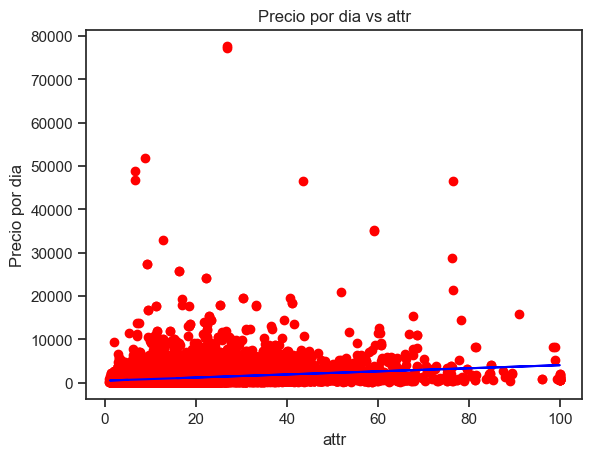

In [ ]:
plt.scatter(X_train.tolist(), y_train.tolist(), color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Precio por dia vs attr')
plt.xlabel('attr')
plt.ylabel('Precio por dia')
plt.show()

#### R2 Coeficiente de determinacion
Entiende la varianza de los datos del modelo y de los datos reales.
Mientras mas se acerca a 1 es mejor.

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.062409178683917044

#### MSE Mean Square Error - Error cuadratico medio
Compara los valores predichos por el modelo con los valores reales al cuadrado.

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

1717202.4040502375

## Prediccion 5
### Predecir precio por dia (dayPrice), teniendo en cuenta la distancia al metro y al centro

In [ ]:
dataset = df

X = dataset.iloc[:, [14, 15]].values #Seleccionar variables metro_dist y dist
y = dataset.iloc[:, 2].values #Seleccionar la variable independiente --> dayPrice

In [ ]:
X

array([[5.0229638 , 2.53938   ],
       [0.48838929, 0.23940392],
       [5.74831192, 3.65162129],
       ...,
       [0.99405133, 0.20253882],
       [3.04409973, 0.28743469],
       [1.26393173, 0.48090251]])

In [ ]:
y

array([ 388.0673962, 1376.983104 ,  528.2028448, ..., 1274.337938 ,
        602.108314 ,  532.9219548])

### 2) Dividir el datase en Training y Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

###  3) Entrenar modelo de Regresión Lineal con el dataset de Training

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### 4) Predecir los resultados del dataset de Test

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([ 975.33005747, 1025.97454687,  980.71525741, ..., 1002.19945463,
       1021.26149368, 1028.60543315])

#### Predecir 1 valor puntual

In [ ]:
valor_dist = 5.022
valor_metro_dist = 2.539
valor_x_array = np.array([valor_dist, valor_metro_dist])
pred_valor_x = regressor.predict(valor_x_array.reshape(-2,2))
pred_valor_x

array([832.96448734])

#### R2 Coeficiente de determinacion
Entiende la varianza de los datos del modelo y de los datos reales.
Mientras mas se acerca a 1 es mejor.

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.004169984788575665

## Prediccion 6
### Predecir indice de atracción (attr_index_norm), teniendo en cuenta la distancia al centro (dist)

In [ ]:
dataset = df

X_row = dataset.iloc[:, 14].values # Seleccionar variable dist
X = X_row.reshape(-1,1)
y = dataset.iloc[:, 17].values # Seleccionar la variable independiente --> attr_indice_normalizado

In [ ]:
X

array([[5.0229638 , 2.53938   ],
       [0.48838929, 0.23940392],
       [5.74831192, 3.65162129],
       ...,
       [0.99405133, 0.20253882],
       [3.04409973, 0.28743469],
       [1.26393173, 0.48090251]])

In [ ]:
y

array([ 388.0673962, 1376.983104 ,  528.2028448, ..., 1274.337938 ,
        602.108314 ,  532.9219548])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([11.22535898,  9.97003098, 15.19477666, ..., 13.42795363,
       14.68783974, 10.87474406])

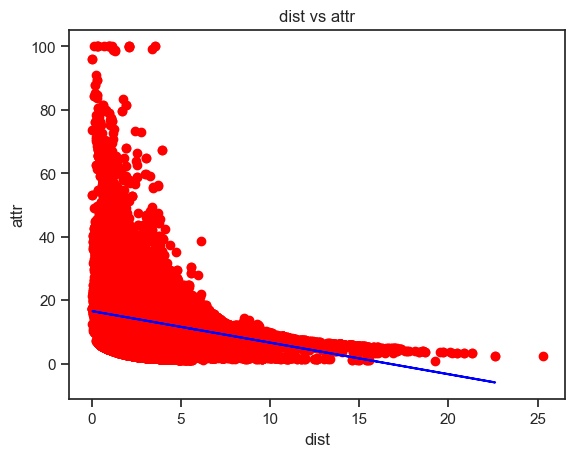

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('dist vs attr')
plt.xlabel('dist')
plt.ylabel('attr')
plt.show()

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.004169984788575665

## Prediccion 7
### Predecir guest_satisfaction_overall a traves del cleanliness_rating	

In [ ]:
dataset = df

X_row = dataset.iloc[:, 11].values # Seleccionar variable cleanlinness_reating
X = X_row.reshape(-1,1)
y = dataset.iloc[:, 12].values # Seleccionar la variable independiente --> guest_satisfaction_overall

In [ ]:
X

array([[10],
       [ 8],
       [ 9],
       ...,
       [10],
       [10],
       [10]], dtype=int64)

In [ ]:
y

array([93, 85, 87, ..., 93, 87, 93], dtype=int64)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([96.73017215, 96.73017215, 89.98867207, ..., 83.247172  ,
       96.73017215, 96.73017215])

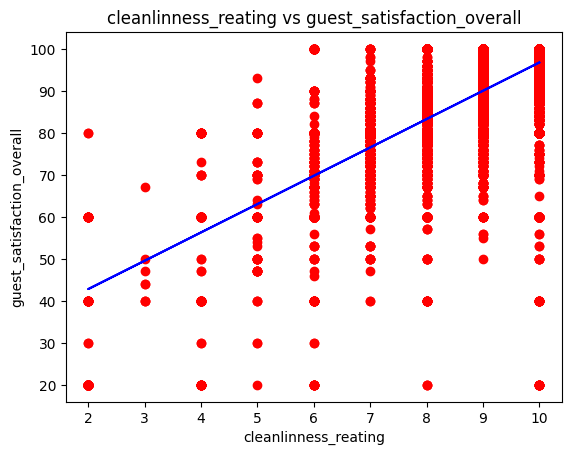

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('cleanlinness_reating vs guest_satisfaction_overall')
plt.xlabel('cleanlinness_reating')
plt.ylabel('guest_satisfaction_overall')

plt.show()

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.45661094020781845

## Predicción 8
### Predecir host_is_superhost a través del cleanliness_rating y guest_satisfaction_overall

In [ ]:
dataset = df

X = dataset.iloc[:, [11, 12]].values # Seleccionar variables cleanliness_rating y guest_satisfaction_overall
y = pd.get_dummies(dataset, columns=['host_is_superhost'], drop_first=True).iloc[:,-1].values #Recortamos para hacer numéricos los True/False de host_is_superhost. Devuelve una columna con True=1 - False=0

In [ ]:
X

4789528

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 75)

In [ ]:
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = regressor.predict(X_test)
print(y_pred.sum())

0


In [ ]:
r2 = r2_score(y_test, y_pred)
r2

-0.32132362335505316

### Matriz de confusión

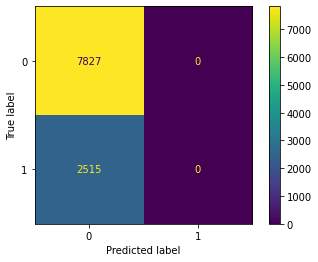

In [ ]:
plot_confusion_matrix(regressor, X_test, y_test)

## Predicción 9
### Predecir room_type a través del dayPriceByPerson

In [ ]:
dataset = df

X = dataset.iloc[:, [3, 13]].values # Seleccionar variables dayPriceByPerson
#Convertimos las variables categóricas en numéricas, y creamos una nueva columna:
category_order = {'Private room': 0, 'Shared room': 1, 'Entire home/apt': 2}
dataset['room_type_category'] = dataset['room_type'].map(category_order)
y = dataset.iloc[:,-1].values

In [ ]:
X

array([[ 48.50842453,   1.        ],
       [ 86.061444  ,   1.        ],
       [ 66.0253556 ,   1.        ],
       ...,
       [159.2922423 ,   1.        ],
       [ 75.26353925,   1.        ],
       [ 33.30762218,   1.        ]])

In [ ]:
y

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 75)

regressor = LogisticRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_pred

c:\Users\Leo\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

-0.5457844943060435

### Matriz de confusión

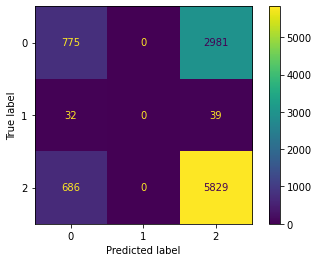

In [ ]:
plot_confusion_matrix(regressor, X_test, y_test)

## Predicción 10
### Predecir city a través del dayPrice y room_type

In [99]:
dataset = df

#Convertimos las variables categóricas en numéricas, y creamos 2 nuevas columna:
city_category_order = {'amsterdam': 0, 'athens': 1, 'barcelona': 2, 'berlin':3,'budapest':4, 'lisbon':5, 'london':6, 'paris':7, 'rome':8, 'vienna':9}
dataset['city_category'] = dataset['city'].map(city_category_order)

room_category_order = {'Private room': 0, 'Shared room': 1, 'Entire home/apt': 2}
dataset['room_type_category'] = dataset['room_type'].map(room_category_order)
X = dataset.iloc[:, [1, -1]].values # Seleccionar variables dayPrice y room_type_category

y = dataset.iloc[:,-2].values

In [79]:
X

array([[ 48.50842453,   0.        ],
       [ 86.061444  ,   0.        ],
       [ 66.02535561,   0.        ],
       ...,
       [159.29224225,   2.        ],
       [ 75.26353926,   0.        ],
       [ 33.30762219,   0.        ]])

In [100]:
y

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 75)

regressor = LogisticRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_pred

c:\Users\leoca\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([6, 6, 7, ..., 7, 6, 8], dtype=int64)

In [102]:
r2 = r2_score(y_test, y_pred)
r2

-0.48507103387201345

### Matriz de confusión

In [103]:
plot_confusion_matrix(regressor, X_test, y_test)

NameError: name 'plot_confusion_matrix' is not defined

## Predicción de la variable objetivo dayPrice

In [3]:
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

city_category_order = {'amsterdam': 0, 'athens': 1, 'barcelona': 2, 'berlin': 3, 'budapest': 4, 'lisbon': 5, 'london': 6, 'paris': 7, 'rome': 8, 'vienna': 9}
df['city_category'] = df['city'].map(city_category_order)

room_category_order = {'Private room': 0, 'Shared room': 1, 'Entire home/apt': 2}
df['room_type_category'] = df['room_type'].map(room_category_order)

columnas = ['dayPrice',
            'person_capacity', 'host_is_superhost', 'multi', 'biz', 'cleanliness_rating',
            'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index',
            'attr_index_norm', 'rest_index', 'rest_index_norm', 'city_category']

# Generar todas las combinaciones posibles de columnas con 3 a 5 elementos
combinaciones_columnas = []
for r in range(3, 6):
    combinaciones_columnas.extend(combinations(columnas, r))

# Variables para almacenar la mejor combinación y su precisión correspondiente
mejor_combinacion = None
mejor_precision = 0.0

# Iterar sobre cada combinación de columnas
for cols in combinaciones_columnas:
    # Obtener las columnas de características y la columna objetivo
    X = df[list(cols)]
    y = df['room_type_category']

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo de regresión logística con un mayor número de iteraciones
    model = LogisticRegression(max_iter=1000000)
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular la precisión del modelo
    precision = accuracy_score(y_test, y_pred)
    
    # Verificar si esta combinación tiene la mejor precisión hasta ahora
    if precision > mejor_precision:
        mejor_precision = precision
        mejor_combinacion = cols
        # Mostrar la combinación y precisión actual
        print(f"Mejor combinación encontrada:")
        print(f"Columnas utilizadas: {', '.join(mejor_combinacion)}")
        print(f"Precisión del modelo: {mejor_precision}")
        print("------------------------")

# Mostrar la mejor combinación encontrada y su precisión correspondiente
print("Mejor combinación final:")
print(f"Columnas utilizadas: {', '.join(mejor_combinacion)}")
print(f"Precisión del modelo: {mejor_precision}")






Mejor combinación encontrada:
Columnas utilizadas: dayPrice, person_capacity, multi
Precisión del modelo: 0.03142406146172472
------------------------
Mejor combinación encontrada:
Columnas utilizadas: dayPrice, person_capacity, bedrooms
Precisión del modelo: 0.12124954308081803
------------------------


KeyboardInterrupt: 

## Predicción de la variable objetivo dayPrice

In [12]:
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

city_category_order = {'amsterdam': 0, 'athens': 1, 'barcelona': 2, 'berlin': 3, 'budapest': 4, 'lisbon': 5, 'london': 6, 'paris': 7, 'rome': 8, 'vienna': 9}
df['city_category'] = df['city'].map(city_category_order)

room_category_order = {'Private room': 0, 'Shared room': 1, 'Entire home/apt': 2}
df['room_type_category'] = df['room_type'].map(room_category_order)

columnas = ['room_type_category',
            'person_capacity', 'host_is_superhost', 'multi', 'biz', 'cleanliness_rating',
            'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index',
            'attr_index_norm', 'rest_index', 'rest_index_norm', 'city_category']

# Generar todas las combinaciones posibles de columnas con 3 a 5 elementos
combinaciones_columnas = []
for r in range(2,17):
    combinaciones_columnas.extend(combinations(columnas, r))

# Variables para almacenar la mejor combinación y su precisión correspondiente
mejor_combinacion = None
mejor_precision = 0.0

# Iterar sobre cada combinación de columnas
for cols in combinaciones_columnas:
    # Obtener las columnas de características y la columna objetivo
    X = df[list(cols)]
    y = df['dayPrice']

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo de regresión logística con un mayor número de iteraciones
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = regressor.predict(X_test)

    # Calcular la precisión del modelo
    precision = r2_score(y_test, y_pred)
    
    # Verificar si esta combinación tiene la mejor precisión hasta ahora
    if precision > mejor_precision:
        mejor_precision = precision
        mejor_combinacion = cols
        # Mostrar la combinación y precisión actual
        print(f"Mejor combinación encontrada:")
        print(f"Columnas utilizadas: {', '.join(mejor_combinacion)}")
        print(f"Precisión del modelo: {mejor_precision}")
        print("------------------------")

# Mostrar la mejor combinación encontrada y su precisión correspondiente
print("Mejor combinación final:")
print(f"Columnas utilizadas: {', '.join(mejor_combinacion)}")
print(f"Precisión del modelo: {mejor_precision}")




Mejor combinación encontrada:
Columnas utilizadas: room_type_category, person_capacity
Precisión del modelo: 0.04480595269694654
------------------------
Mejor combinación encontrada:
Columnas utilizadas: room_type_category, bedrooms
Precisión del modelo: 0.06831962612943099
------------------------
Mejor combinación encontrada:
Columnas utilizadas: room_type_category, attr_index_norm
Precisión del modelo: 0.11153447700697239
------------------------
Mejor combinación encontrada:
Columnas utilizadas: person_capacity, attr_index_norm
Precisión del modelo: 0.12943793857775565
------------------------
Mejor combinación encontrada:
Columnas utilizadas: bedrooms, attr_index_norm
Precisión del modelo: 0.14423873977527712
------------------------
Mejor combinación encontrada:
Columnas utilizadas: room_type_category, bedrooms, attr_index_norm
Precisión del modelo: 0.16118613124863124
------------------------
Mejor combinación encontrada:
Columnas utilizadas: room_type_category, person_capacity

KeyboardInterrupt: 